<a href="https://colab.research.google.com/github/YYK31/Online-Retail-Customer-Segmentation/blob/main/Retail_Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Online Retail Customer Segmentation**     



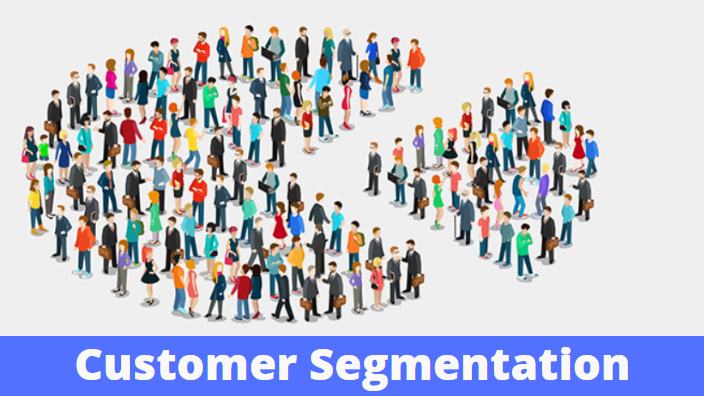

##### **Project Type**    - Unsupervised Learning
##### **Contribution**    - Individual
##### **Name -**    YASH KAMBLE

# **GitHub Link -**

# **Project Summary -**

In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

#### **Business Objective** 

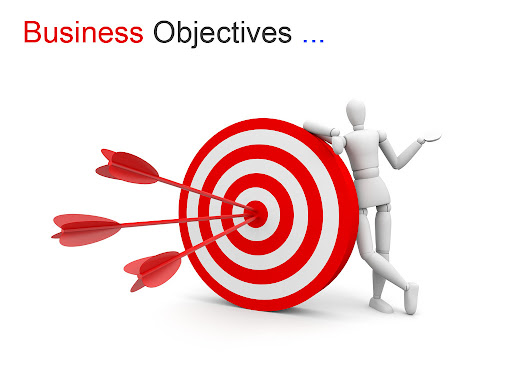

The business objective for this project is to identify the major customer segments of a UK-based online retail company that sells unique all-occasion gifts using transaction data from 01/12/2010 to 09/12/2011. The company aims to understand its customer base and identify key segments to target for future sales and marketing efforts.

# ***Let's Begin !***

# ***1. Know Your Data***

### Import Libraries

In [1]:
! pip install klib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 10.4 MB/s eta 0:00:00
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [2]:
import klib

In [3]:
#***********************************************************************# Importing all the required libraries for the data exploration #*****************************************************************
#==============================================================================================#
#==============================================================================================#
# import Numpy. It consists of Single dimentional array & Multi-dimensional array object.
import numpy as n
#----------------------------------------------------------------------------------------------#
# import Pandas. It consists of single and multi- dimensional data struture for data manipulation. 
import pandas as pd
#----------------------------------------------------------------------------------------------#
# import matplotlib. Matplotlib is a python libraray used for data visualization 
from matplotlib import pyplot as plt
%matplotlib inline
#----------------------------------------------------------------------------------------------#
# import seaborn . Seaborn is a python libraray used for data visualization
import seaborn as sns
#----------------------------------------------------------------------------------------------#
# we can import a module named datetime to work with dates as date objects.
import datetime
#----------------------------------------------------------------------------------------------#
#SciPy in Python is an open-source library used for solving mathematical, scientific, engineering, 
#and technical problems.
import scipy
#----------------------------------------------------------------------------------------------#
# scipy.stats is use for importing statistics.
import scipy.stats as stat
#----------------------------------------------------------------------------------------------#
# With the help math we perfrom mathematical Operation
import math
#----------------------------------------------------------------------------------------------#
# It provides a selection of efficient tools for machine learning and statistical modeling including
# classification, regression, clustering and dimensionality reduction via a consistence interface in Python.
import sklearn
#----------------------------------------------------------------------------------------------#
#Generate isotropic Gaussian blobs for clustering.
from sklearn.datasets import make_blobs
#----------------------------------------------------------------------------------------------#
# import kmeans from sklearn.cluster
from sklearn.cluster import KMeans
#----------------------------------------------------------------------------------------------#
# import silhouette sample and silhouettle score
from sklearn.metrics import silhouette_samples, silhouette_score
#----------------------------------------------------------------------------------------------#
#import cm import matplotlib.cm
import matplotlib.cm as cm
#----------------------------------------------------------------------------------------------#
# import px import plotly.express
import plotly.express as px
#----------------------------------------------------------------------------------------------#
# import KElbowVisualizer and SilhouetteVisualizer from yellowbrick.cluster
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
#----------------------------------------------------------------------------------------------#
#import preprocessing from sklearn
from sklearn import preprocessing
#----------------------------------------------------------------------------------------------#
#import  StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
#----------------------------------------------------------------------------------------------#
# import linkage from scipy.cluster.hierarchy
from scipy.cluster.hierarchy import linkage
#----------------------------------------------------------------------------------------------#
#import dendrogram from scipy.cluster.hierarchy
from scipy.cluster.hierarchy import dendrogram
#----------------------------------------------------------------------------------------------#
#import cut_tree from scipy.cluster.hierarchy 
from scipy.cluster.hierarchy import cut_tree
#==============================================================================================#
#==============================================================================================#

### Dataset Loading

In [4]:
# Give Google Access to Your Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Declare the path of mydrive
path='/content/drive/MyDrive/'

In [6]:
# loading an Customer Segmentation dataset
online_retail=pd.read_excel("/content/drive/MyDrive/aba/Online Retail.xlsx")

### Dataset First View

In [ ]:
# having a glance of top 5 record of the Customer Segmentation dataset
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# having a glance of last 5 record of the Customer Segmentation dataset
online_retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### Dataset Rows & Columns count

In [ ]:
# Looking at the number of rows and coloums in the Customer Segmentation dataset
online_retail.shape

(541909, 8)

### Dataset Information

In [ ]:
# getting information of Customer Segmentation data
online_retail.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# ***2. Understanding Your Variables***

###Statistics

In [ ]:
# Dataset Columns
online_retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# get statistics information of data
online_retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description 



*   InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.
*   StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

*   Description: Product (item) name. Nominal.
*   Quantity: The quantities of each product (item) per transaction

*   InvoiceDate: Invice Date and time.
*   UnitPrice: Unit price

*   CustomerID: Customer number.
*   Country: Country name.









### Check Unique Values for each variable.

In [ ]:
# exclude long lenght variable
unique_df=online_retail.drop(['Quantity','InvoiceDate'], axis=1)

In [ ]:
# Check the Unique Values of variable.
print("Unique values of columns: \n")
for i in unique_df :
  print(f'Unique values of {i} column ======= {unique_df[i].unique()}')

Unique values of columns: 

Unique values of InvoiceNo column ======= [536365 536366 536367 ... 581585 581586 581587]
Unique values of StockCode column ======= ['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]
Unique values of Description column ======= ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Unique values of UnitPrice column ======= [   2.55    3.39    2.75 ...  933.17 1714.17  224.69]
Unique values of CustomerID column ======= [17850. 13047. 12583. ... 13298. 14569. 12713.]
Unique values of Country column ======= ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 '

# 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# getting information of Customer Segmentation data
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Cheaking the datatypes of all columns.
online_retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
# count of null values
online_retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

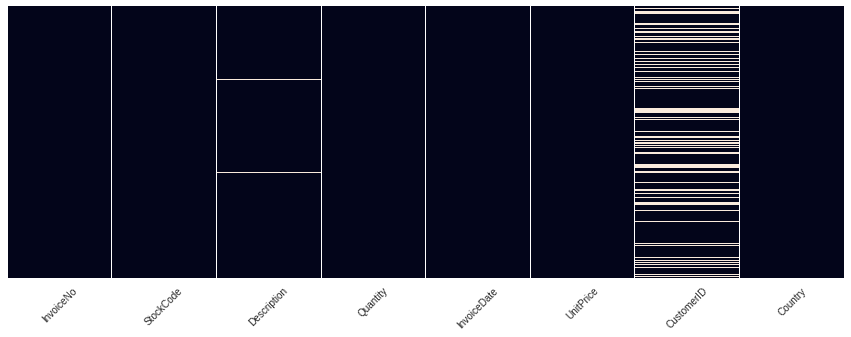

In [ ]:
# visualization of null values 
plt.figure(figsize=(15,5))
sns.heatmap(online_retail.isnull(), cbar=False, yticklabels=False, cmap='rocket')
# Rotate the x-axis tick labels
plt.xticks(rotation=45)
plt.show()

In [ ]:
# removing null values from online_retail
online_retail_df = online_retail[pd.notnull(online_retail['CustomerID'])]

In [ ]:
# count of new data
online_retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# getting information of Customer Segmentation data
online_retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


### Duplicate Values

In [ ]:
# cheaking the duplicates values in Customer Segmentation dataset
online_retail_df.duplicated().sum()

5225

In [ ]:
#using dropna() method removes the rows that contains NULL values & stored in new variable
online_retail_final=online_retail_df.drop_duplicates() 

In [ ]:
# Looking at the number of rows and coloums in the Customer Segmentation dataset
online_retail_final.shape

(401604, 8)

In [ ]:
# Removing all negative values in Quantity columns
online_retail_final = online_retail_final[online_retail_final['Quantity'] > 0]

### What did you know about your dataset?







As per our intial overview of data i got following observation:



*   Our final dataset have 2 categorical features with object dtype,1 datetime features 3 continuous features with either int and float dtypes.
*  We Drop the customerID And Description Null values using pd.notnull metho
*  Our final Dataset have 401604 records and 8 columns.
*  We Remove all negative values in Quantity columns






### What all manipulations have you done and insights you found?



Our Dataset have 5268 Duplicate Values So we remove it and updated data set store in online_retail_final.

# ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Chart-1-Density Distrubution of Numerical columns(Multivariate)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


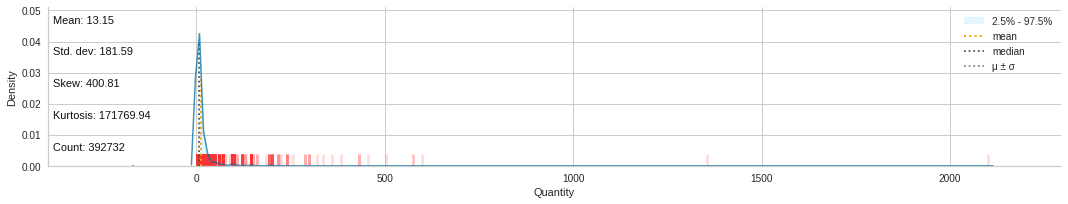

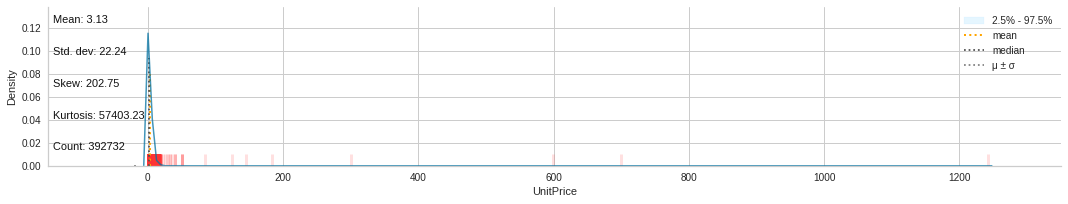

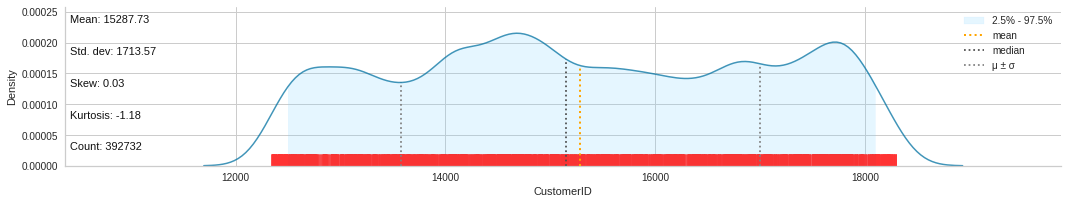

In [ ]:
##import the klib for density Distrubution
import klib
klib.dist_plot(online_retail_final)

Density Distribution & Stastastical Representaion Of Numerical Columns.

#### Chart - 2 - Description (Univariate categorical)

In [ ]:
# total value counts for Description
online_retail_final.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1714
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1390
                                      ... 
GREEN WITH METAL BAG CHARM               1
WHITE WITH METAL BAG CHARM               1
BLUE/NAT SHELL NECKLACE W PENDANT        1
PINK EASTER HENS+FLOWER                  1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Description, Length: 3877, dtype: int64

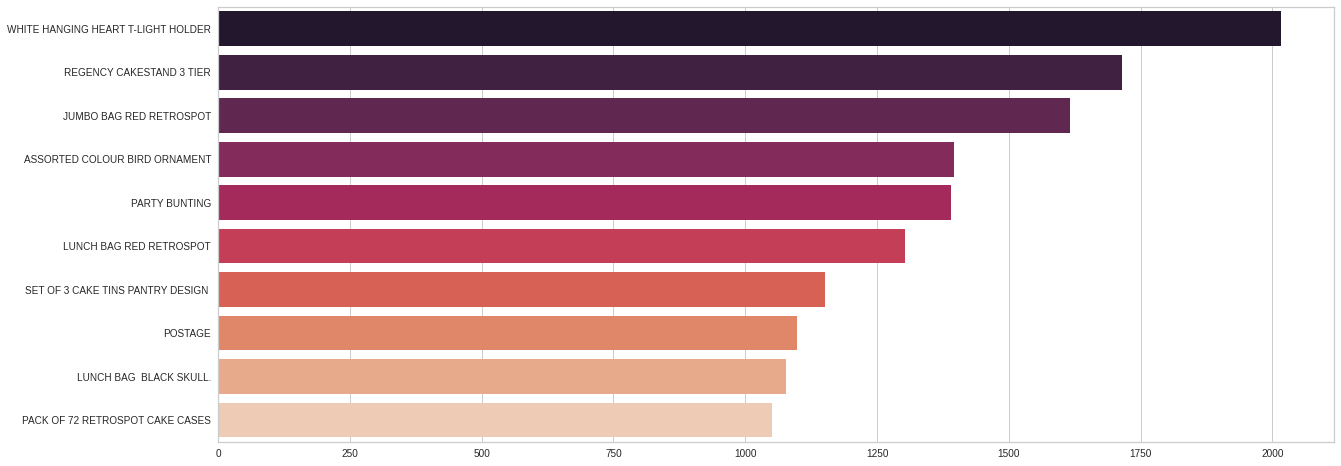

In [ ]:
#figure size = use for set figure size
plt.figure(figsize=(20,8))
#Barplot
sns.barplot(x=online_retail_final['Description'].value_counts().head(10).values,y=online_retail_final['Description'].value_counts().head(10).index,palette='rocket') 
plt.show()

Bar charts are commonly used to display frequency distributions, which show the number of observations for each category or group.

To show the Product total counts, I have used Bar Chart.

After creating visualization ,I found that top selling product.The product "WHITE HANGING HEART T-LIGHT HOLDER " has made the most money.

#### Chart - 3 - Country (Univariate categorical)

In [ ]:
## total value counts for Country
online_retail_final.Country.value_counts()

United Kingdom          349227
Germany                   9027
France                    8327
EIRE                      7228
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

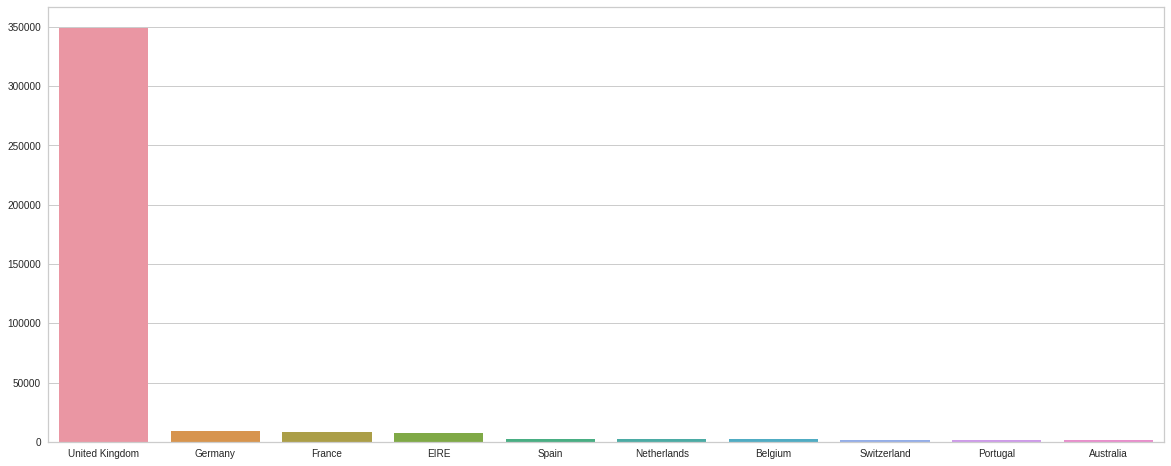

In [ ]:
#figure size = use for set figure size
plt.figure(figsize=(20,8))
#Barplot
sns.barplot(y=online_retail_final['Country'].value_counts().head(10).values,x=online_retail_final['Country'].value_counts().head(10).index) 
plt.show()

Bar charts are commonly used to display frequency distributions, which show the number of observations for each category or group.

To show the Country's total counts, I have used Bar Chart.

After creating visualization ,United Kingdom has the most orders placed, with around 3 lakh orders. Germany being second, but way less than United Kingdom.

#### Chart - 4 - Country Vs Quantity(Biivariate categorical-Numerical)

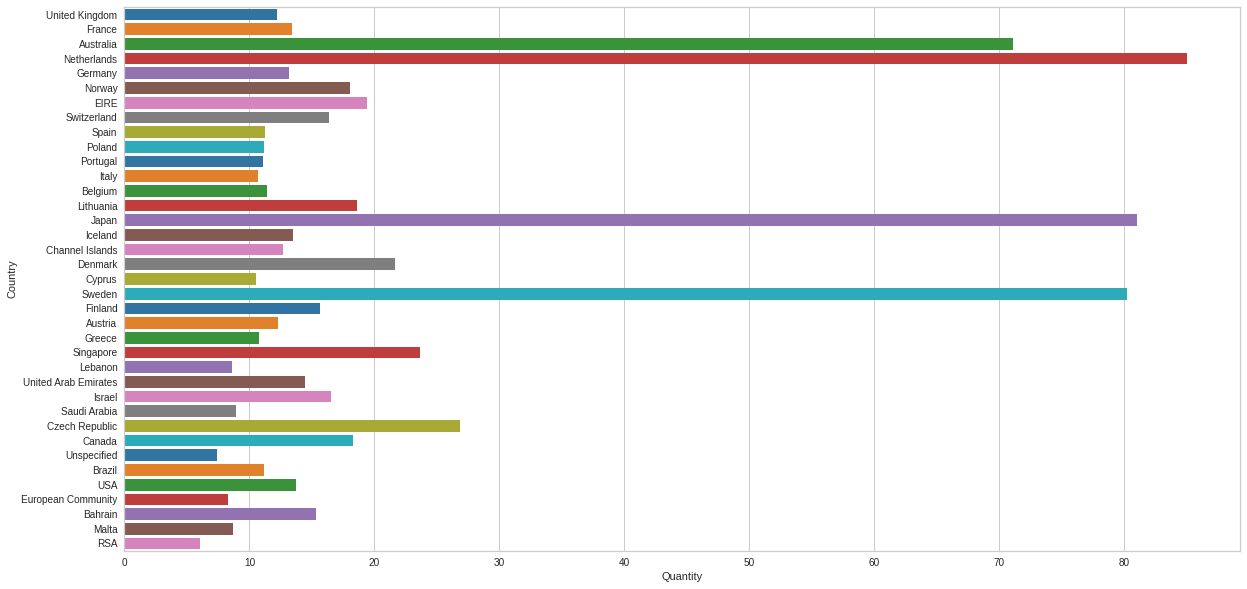

In [ ]:
#figure size
plt.figure(figsize=(20,10))
# BarPlot
sns.barplot(x='Quantity',y='Country',data=online_retail_final,palette='tab10',ci=None)

Bar charts are useful in highlighting patterns in data, such as trends, changes over time, and differences between groups.

After creating visualization ,I found that Australia , Netherland ,japan & Sweden has Most number quntity of each products. 

#### Chart - 5 - Quantity Vs Date(Bivariate)

In [ ]:
# Group by Invoicedate abd Quantity
online_r_QD= online_retail_final.groupby("InvoiceDate").Quantity.sum()
online_r_QD.head()

InvoiceDate
2010-12-01 08:26:00     40
2010-12-01 08:28:00     12
2010-12-01 08:34:00     98
2010-12-01 08:35:00      3
2010-12-01 08:45:00    449
Name: Quantity, dtype: int64

In [ ]:
# Group by Invoicedate abd Quantity
online_r_QD=pd.DataFrame(online_r_QD)
online_r_QD=online_r_QD.reset_index()
online_r_QD.head()
     

,InvoiceDate,Quantity
0,2010-12-01 08:26:00,40
1,2010-12-01 08:28:00,12
2,2010-12-01 08:34:00,98
3,2010-12-01 08:35:00,3
4,2010-12-01 08:45:00,449


In [ ]:
#quantity vs Date plot
def plot_df(online_retail_final, x, y, title="", xlabel='Date', ylabel='Orders', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.show()

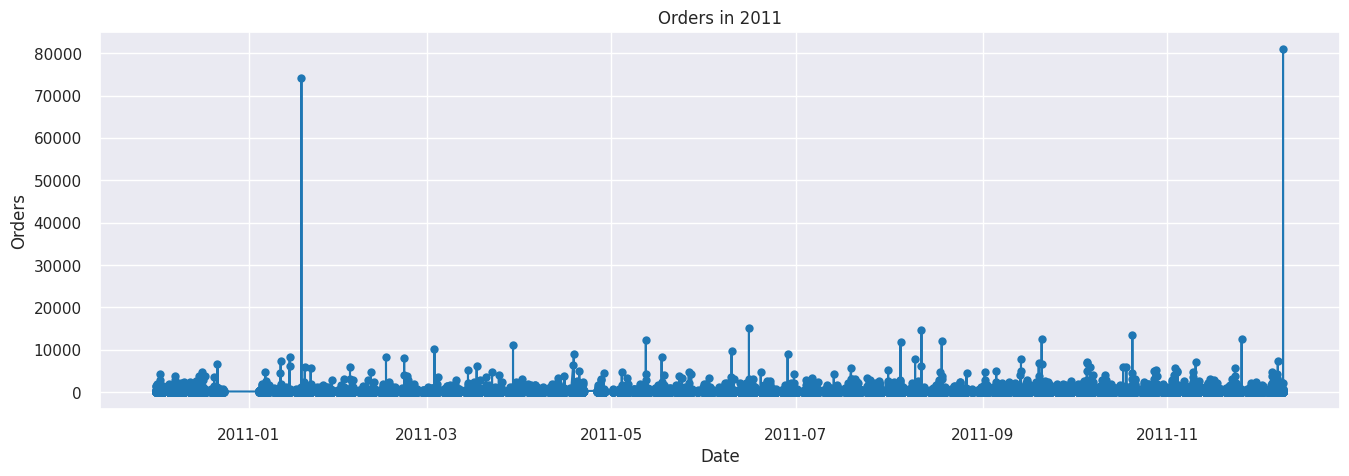

In [ ]:
plot_df(online_r_QD, x=online_r_QD.InvoiceDate, y=online_r_QD.Quantity,title='Orders in 2011')

Line plots are simple and easy to understand, making them a good choice for displaying data to a general audience.

 After creating visualization ,Most of the customers purchased items in the month of February, December and the least number of purchases in April,may,August January

#### Chart - 6 - Customers Vs Date(Bivariate Numerical-Numerical)

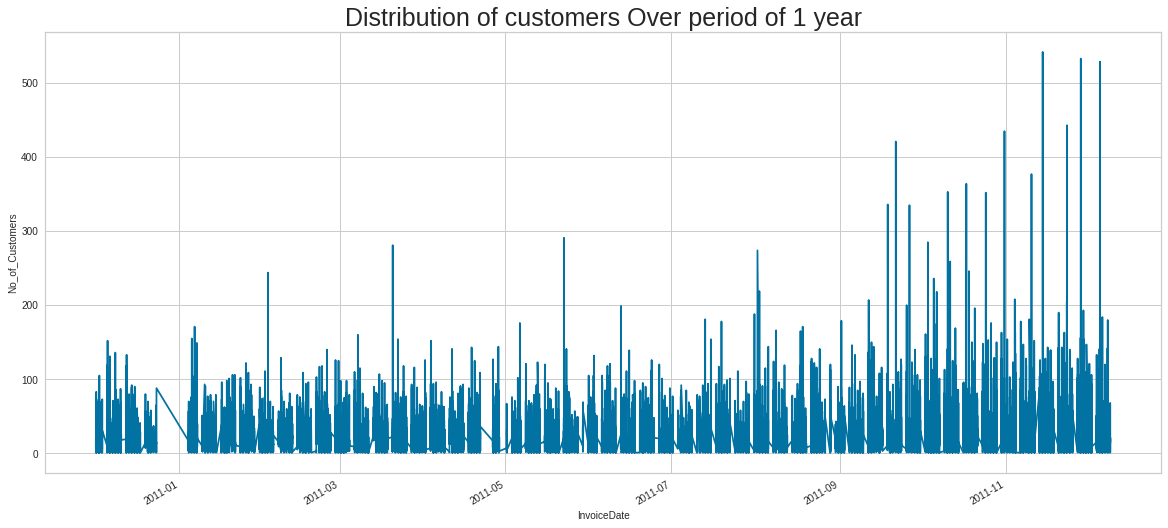

In [ ]:
#customer distribution in 1 year time period
plt.figure(figsize=(20,9))
distribution_of_cus = online_retail_final.groupby('InvoiceDate').count()['CustomerID'].plot()

#Set title and x, y labels
plt.title('Distribution of customers Over period of 1 year', size=25)
plt.xlabel('InvoiceDate', size=10)
plt.ylabel('No_of_Customers', size=10)
plt.show()

Line plots are particularly useful for displaying time-series data, as they allow you to see patterns and trends over time.

After creating visualization ,I found that 2011-09 customers are increase tremendously.

#### Chart - 7 - CustomerID Vs Amount (Bivariate Numerical-Numerical)

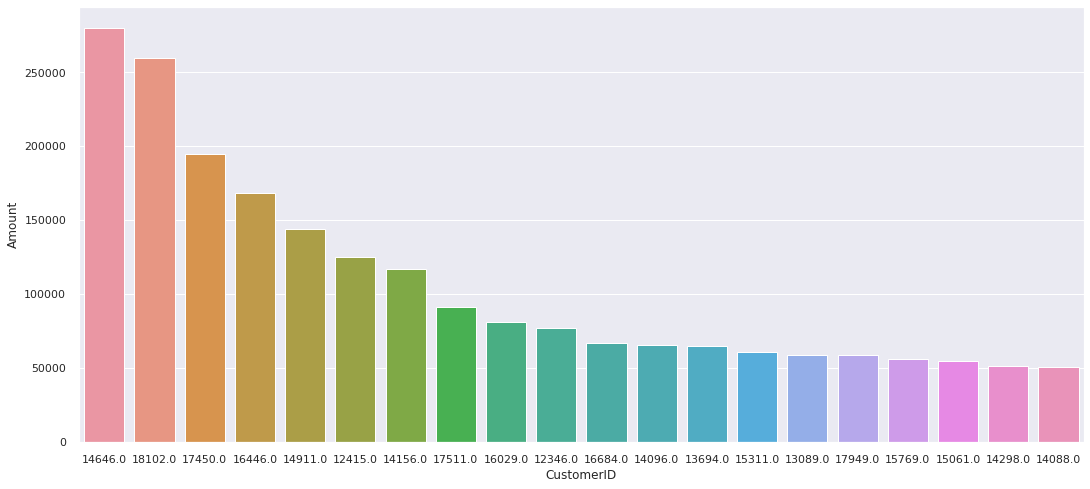

In [ ]:
#polt of  CustomerID Vs Amount 
online_retail_final_copy = online_retail_final.copy()
#calculate Amount
online_retail_final_copy['Amount'] = online_retail_final_copy.Quantity*online_retail_final_copy.UnitPrice
#fig = plt.figure(figsize=(25, 8))
#Group By CustomerID & Amount
sales_percentage = online_retail_final_copy.groupby(["CustomerID"]).Amount.sum().sort_values(ascending = False).iloc[:20].reset_index()
sales_percentage.head(10)
sns.set(rc={'figure.figsize':(18,8)})
sns.barplot(x="CustomerID", y="Amount", data=sales_percentage, order=sales_percentage['CustomerID'])

Bar charts are useful in highlighting patterns in data, such as trends, changes over time, and differences between groups.

After visualization i found that,The customer with the ID: 14646 has the highest number of orders and the customer with the ID: 14088 has the lowest number of orders.

#### Chart - 8 - Correlation Heatmap

In [ ]:
# creating Correlation Heatmap
cor=online_retail_final.corr()
cor

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.004577,-0.00621
UnitPrice,-0.004577,1.000000,-0.01079
CustomerID,-0.006210,-0.010790,1.00000


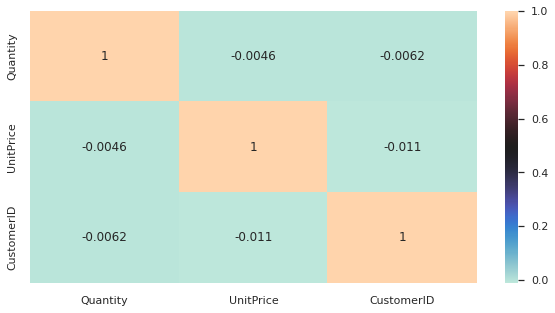

In [ ]:
#figure size
plt.figure(figsize=(10,5))
#heatmap for corrletion
sns.heatmap(data=cor,annot= True,cmap='icefire')

 Heatmaps are effective in comparing multiple variables at once. They make it easy to identify patterns and relationships between variables, such as how two variables change together.  heatmaps are a powerful data visualization tool that can be used to effectively identify patterns

 As we can see, there is no distinct correlation between the variables



#### Chart - 9 - Pairplot

<Figure size 1440x576 with 0 Axes>

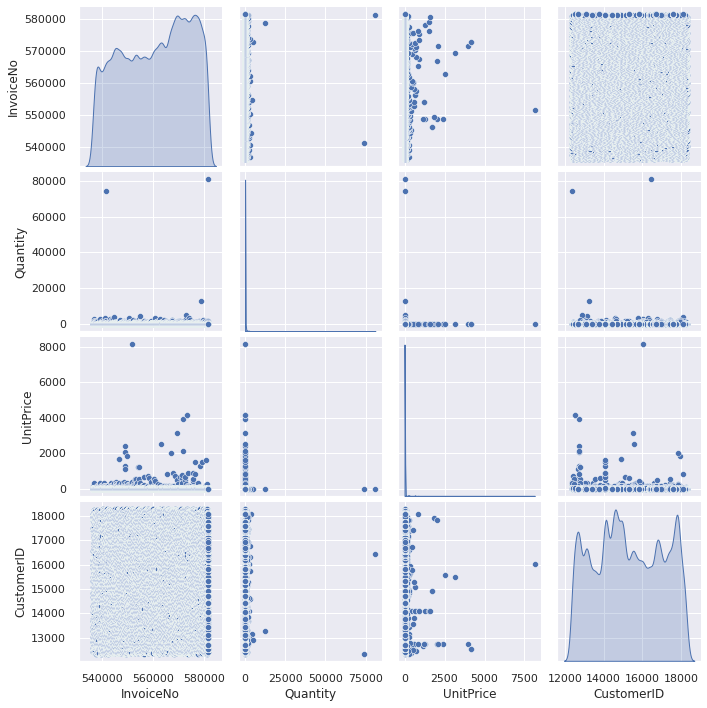

In [ ]:
#figure size
plt.figure(figsize=(20,8))
#pairplot
pairplot=sns.pairplot(online_retail_final,diag_kind='kde')

Pairplots can be used to quickly explore the relationship between multiple variables in a dataset. They make it easy to identify patterns and relationships between variables, such as how two variables change together. They can help identify patterns, correlations, and outliers in the data, and can be useful in identifying the most important variables that contribute to variations in the data.

# ***5. Feature Engineering & Data Pre-processing***

### RFM Analysis (Recency, Frequency,Monetary value)

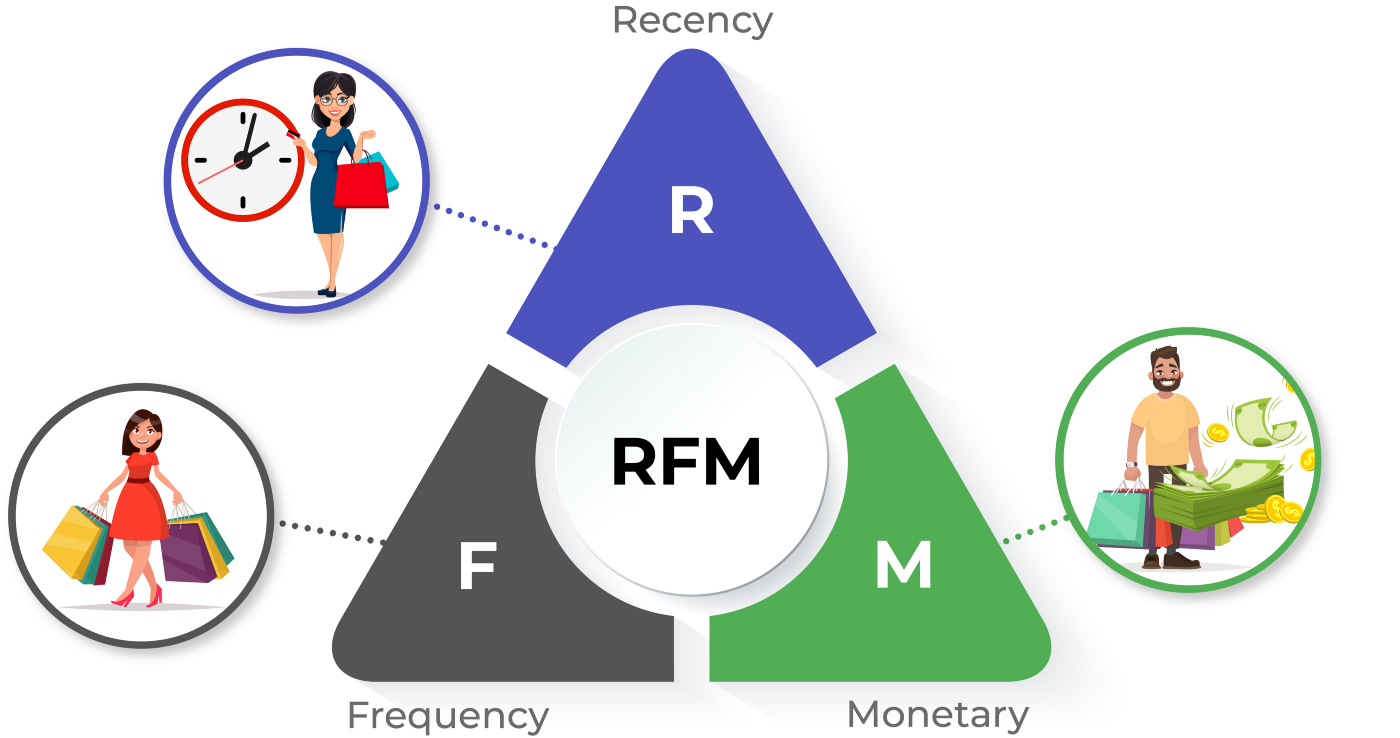

RFM (Recency, Frequency, Monetary Value) is a customer segmentation technique that uses past purchase behavior to divide customers into groups.

Recency: How recently a customer made a purchase
Frequency: How often a customer makes a purchase
Monetary Value: How much a customer spends on each purchase
Based on these three metrics, customers can be segmented into different groups such as "High Value Frequent Buyers" or "Low Value Infrequent Buyers." This information can then be used to target marketing and promotional efforts to the appropriate group.

RFM analysis can be used in retail, e-commerce, and other industries to identify valuable customers and target marketing efforts to increase sales and profitability.

In [ ]:
#Creating a variable to hold the latest date in the dataset
latest_date_df = online_retail_final['InvoiceDate'].max()

In [ ]:
#Creating a dataframe to contain the most recent date of order for each customer
rec_df = online_retail_final.groupby('CustomerID')['InvoiceDate'].max().reset_index()
rec_df.head()

,CustomerID,InvoiceDate
0,12346.0,2011-01-18 10:01:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00


In [ ]:
#creating a dataframe to contain the number of times a customer has ordered
freq_df = online_retail_final.groupby('CustomerID')['InvoiceNo'].count().reset_index()
freq_df.head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
#Creating the total amount column
online_retail_final['total_amount'] = online_retail_final['Quantity'] * online_retail_final['UnitPrice']

In [ ]:
#creating a dataframe to contain the total spends of a customer
mone_df = online_retail_final.groupby('CustomerID')['total_amount'].sum().reset_index()
mone_df.head()

,CustomerID,total_amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
import pandas as pd
# load the dataframe rec_df, freq_df, mone_df

# Find the latest date in the invoice date column
latest_date = rec_df['InvoiceDate'].max()

# Create a new dataframe to store the RFM values
r_f_m_df = pd.DataFrame()

# Add the customer ID column to the new dataframe
r_f_m_df['CustomerID'] = rec_df['CustomerID']

# Add the recency column to the new dataframe
r_f_m_df['Recency'] = rec_df['InvoiceDate'].apply(lambda x: (latest_date-x).days)

# Add the frequency column to the new dataframe
r_f_m_df['Frequency'] = freq_df['InvoiceNo']

# Add the monetary column to the new dataframe
r_f_m_df['Monetary'] = mone_df['total_amount']


In [ ]:
#Setting the CustomerID as the index
r_f_m_df.set_index('CustomerID',inplace=True)

#First 10 observations of the RFM dataframe
r_f_m_df.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40
12352.0,35,85,2506.04
12353.0,203,4,89.00
12354.0,231,58,1079.40
12355.0,213,13,459.40


In [ ]:
#Creating a list with the columns of the rfm dataframe
rfm_cols_df = ['Recency','Frequency','Monetary']

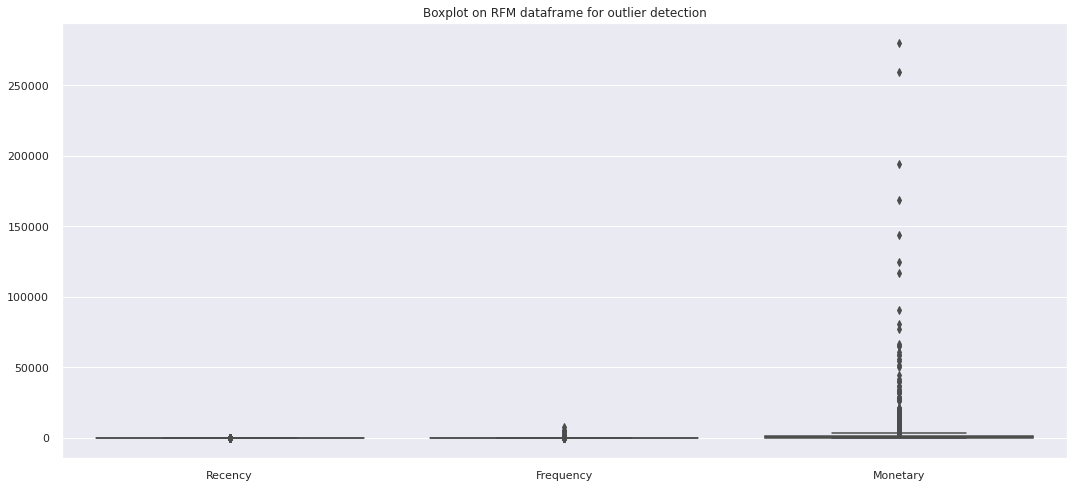

In [ ]:
#Checking for outliers in the rfm dataframe
sns.boxplot(data=r_f_m_df[rfm_cols_df])
plt.title('Boxplot on RFM dataframe for outlier detection')
plt.show()

In [ ]:
#shape of the dataframe before removing outliers
r_f_m_df.shape

(4339, 3)

In [ ]:
# Import the necessary library
from scipy import stats

# Function to remove outliers
def remove_outliers(data, col):
    z_scores = stats.zscore(data[col])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3)
    data = data[filtered_entries]
    return data

In [ ]:
#Removing the outliers
import numpy as np
r_f_m_df = remove_outliers(data=r_f_m_df,col='Recency')
r_f_m_df = remove_outliers(data=r_f_m_df,col='Frequency')
r_f_m_df = remove_outliers(data=r_f_m_df,col='Monetary')

In [ ]:
#Shape of the dataframe after deleting the outliers
r_f_m_df.shape

(4283, 3)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

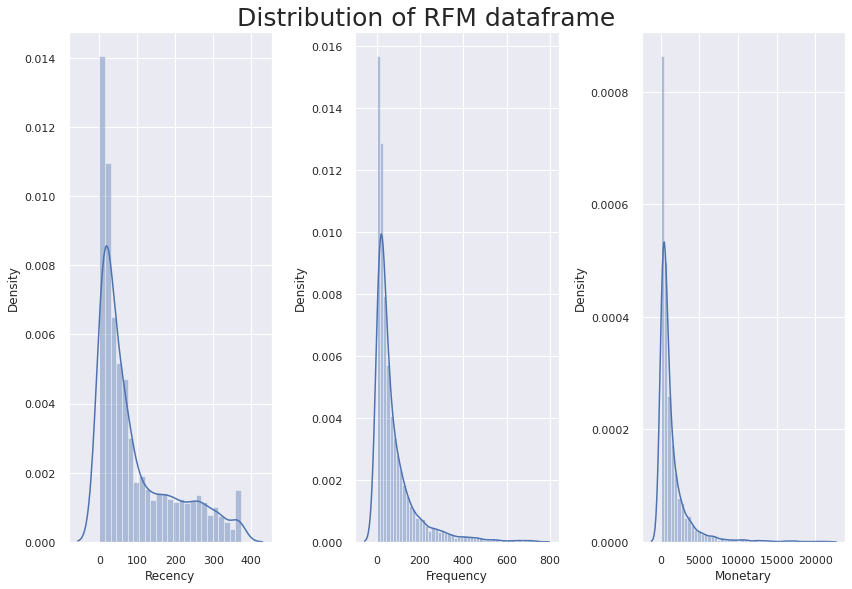

In [ ]:
#Plotting the distribution of the columns of the RFM dataframe
plt.figure(figsize=(12,8))
plt.suptitle('Distribution of RFM dataframe',va='bottom',size=25)
for index, item in enumerate(rfm_cols_df):
  plt.subplot(1,3,index+1)
  sns.distplot(r_f_m_df[item])
plt.tight_layout()


1. Most of the customers have a Recency between 0-100 days.
2. Most of the customers have a frequency between 0-120 times.
3. Most of the customers have a Monetary between 0- 1000 sterlings.

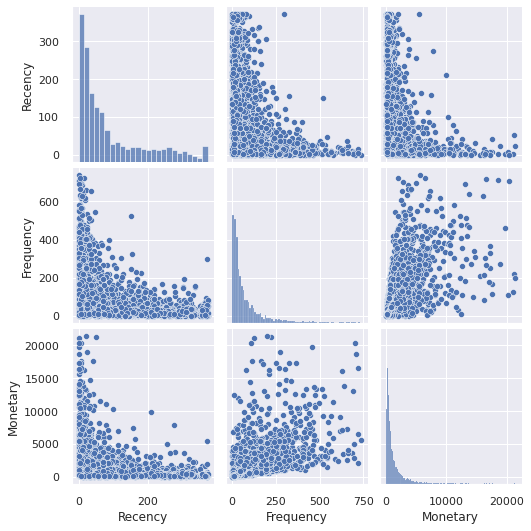

In [ ]:
#plotting the pairplot to see the relation bewteen the columns of the RFM dataframe
sns.pairplot(r_f_m_df)
plt.show()

Pairplots can be used to quickly explore the relationship between multiple variables in a dataset. They make it easy to identify patterns and relationships between variables, such as how two variables change together. They can help identify patterns, correlations, and outliers in the data, and can be useful in identifying the most important variables that contribute to variations in the data.

 Most of the values are linked to lower recency values.
 
 There are very few values linked to a large recency value and large monetary/frequency value.

The Frequency and Monetory column show a pretty linear relationship with each other.

### Scaling Data

**Feature Scaling** is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

In [ ]:
#Scaling and normalising the data
scaler_df = StandardScaler()
from sklearn.preprocessing import Normalizer
normaliser = Normalizer()
rfm_scaled_df = scaler_df.fit_transform(r_f_m_df)
rfm_scaled_df = normaliser.fit_transform(rfm_scaled_df)

In [ ]:
#A look of the scaled data
rfm_scaled_df

array([[-0.47579768,  0.54075457,  0.69368657],
       [-0.35109325, -0.87213949,  0.34074366],
       [-0.97596192, -0.05488425,  0.21091714],
       ...,
       [-0.70538472, -0.53405314, -0.46606828],
       [-0.13857658,  0.9893097 ,  0.04541862],
       [-0.92315365, -0.13105556,  0.36140251]])

# **6 Model implementation:**



Machine learning models can be described as programs that are trained to find patterns or trends within data and predict the result for new data.

In this project we are dealing with an unlabelled dataset and a clustering problem, therefore we'll be using some unsupervised algorithms.

In this project we will be including the following models:
1. K Means.
2. K means with elbow method.
3. Hierarchical clustering

### Model 1:- KMeans Clustering


k-means model is an unsupervised machine learning algorithm. k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

In [ ]:
#Training the KMeans model on the dataset
kmeans_model_df = KMeans(n_clusters=2,init='k-means++',max_iter=1000, random_state=0)
cluster_predict_df = kmeans_model_df.fit_predict(rfm_scaled_df)
cluster_predict_df

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

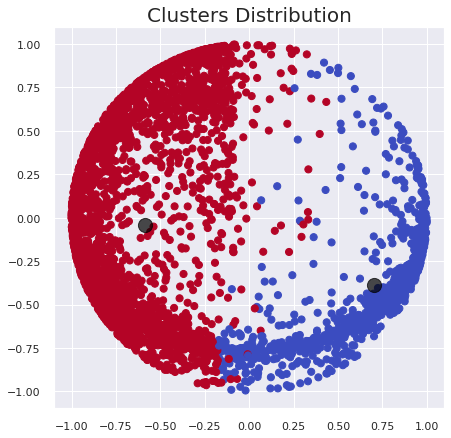

In [ ]:
#Visualising the kmeans clustering
plt.figure(figsize=(7,7))
plt.scatter(x=rfm_scaled_df[:,0],y=rfm_scaled_df[:,1],c=cluster_predict_df,s=50,cmap='coolwarm')

#Plotting the cluster centres 
centers = kmeans_model_df.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7)

plt.title("Clusters Distribution",size=20)
plt.show()

In [ ]:
def eval_metrics(data:pd.DataFrame,labels: np.array):
  """A function that calculates the evaluation metrics 
     for the unsupervised machine learning algorithm."""
  #A higher silhouette score is better  
  sh_score = silhouette_score(data,labels)

  from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
  #A higher calinski harabasz score is better
  ch_index = calinski_harabasz_score(data,labels)
  #A lower Davies Bouldin score is better
  db_score = davies_bouldin_score(data,labels)
  print('The evaluation metrics are:\n')
  print('1. The silhouette score is:',sh_score)
  print('\n2. The Calinski harabasz index is:',ch_index)
  print('\n3. The Davies Bouldin score is:',db_score)

### Evaluation metrics for the K-means model

In [ ]:
#Calculating the evaluation metrics for the K-means model
eval_metrics(rfm_scaled_df,cluster_predict_df)

The evaluation metrics are:

1. The silhouette score is: 0.4592515429835919

2. The Calinski harabasz index is: 3495.19386753036

3. The Davies Bouldin score is: 0.8724544867191162


### Model 2:- K-Means with elbow method



<b>Elbow method:</b> In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

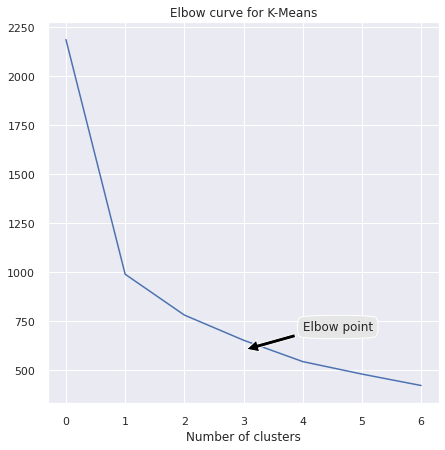

In [ ]:
#Getting the elbow curve for different number of clusters
wcss = []

#Creating a list of number of clusters
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

#Implementing the model for different number of clusters
for num_clusters in range_n_clusters:
    kmeans_model = KMeans(n_clusters=num_clusters,max_iter=1000,random_state=0)
    kmeans_model.fit_predict(rfm_scaled_df)
    
    wcss.append(kmeans_model.inertia_)
    
# plot the elbow curve 
plt.figure(figsize=(7,7))
plt.plot(wcss)
plt.title('Elbow curve for K-Means')
plt.xlabel('Number of clusters')
plt.annotate('Elbow point', xy=(3, 600), xytext=(4,700),\
             bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),\
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

In [ ]:
#Implementing KMeans with 3 clusters
kmeans_model_df1 = KMeans(n_clusters=3,max_iter=1000,random_state=0)
cluster_predict_df1 = kmeans_model_df1.fit_predict(rfm_scaled_df)
cluster_predict_df1

array([2, 0, 2, ..., 0, 2, 2], dtype=int32)

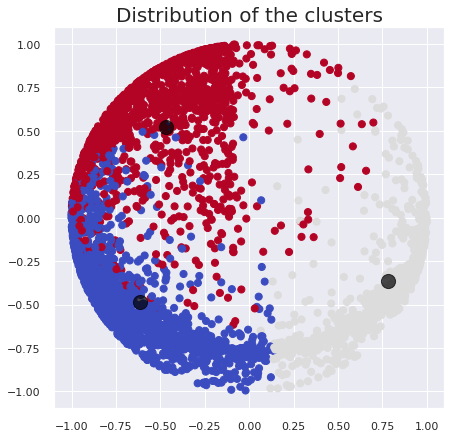

In [ ]:
#Visualising the kmeans clustering
plt.figure(figsize=(7,7))
plt.scatter(x=rfm_scaled_df[:,0],y=rfm_scaled_df[:,1],c=cluster_predict_df1,s=50,cmap='coolwarm')

#Plotting the cluster centres 
centers = kmeans_model_df1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7)

plt.title("Distribution of the clusters",size=20)
plt.show()

### Evaluation metrics for the K-means model with 3 clusters

In [ ]:
#Calculating the evaluation metrics for the K-means model with 3 clusters
eval_metrics(rfm_scaled_df,cluster_predict_df1)

The evaluation metrics are:

1. The silhouette score is: 0.5644655332425986

2. The Calinski harabasz index is: 6465.176239726391

3. The Davies Bouldin score is: 0.6500926225546945


#### <b>Cluster profiling for KMeans with 3 clusters.</b>

In [ ]:
#Creating a copy of the original dataframe
rfm_kmeans_df = r_f_m_df.copy()

In [ ]:
#Assigning the labels to the dataframe
rfm_kmeans_df['Labels'] = cluster_predict_df1

#Checking the value counts for different lables
rfm_kmeans_df['Labels'].value_counts()

0    1755
1    1311
2    1217
Name: Labels, dtype: int64

In [ ]:
#Getting the mean values for each label
rfm_kmeans_df.groupby('Labels').mean()

,Recency,Frequency,Monetary
Labels,,,
0,39.202279,35.520228,618.247500
1,223.103738,27.838291,495.877133
2,28.522597,190.552999,3526.820156


In [ ]:
def visualise_dist(data:pd.DataFrame,y:str,x:str='Labels'):
  """A function that produces a boxplot visualisation
     which shows the distribution of the data over
     different clusters in the data"""
  sns.boxplot(data=data,x=x,y=y)
  plt.title(f'{y} value distribution among different labels')
  plt.show()

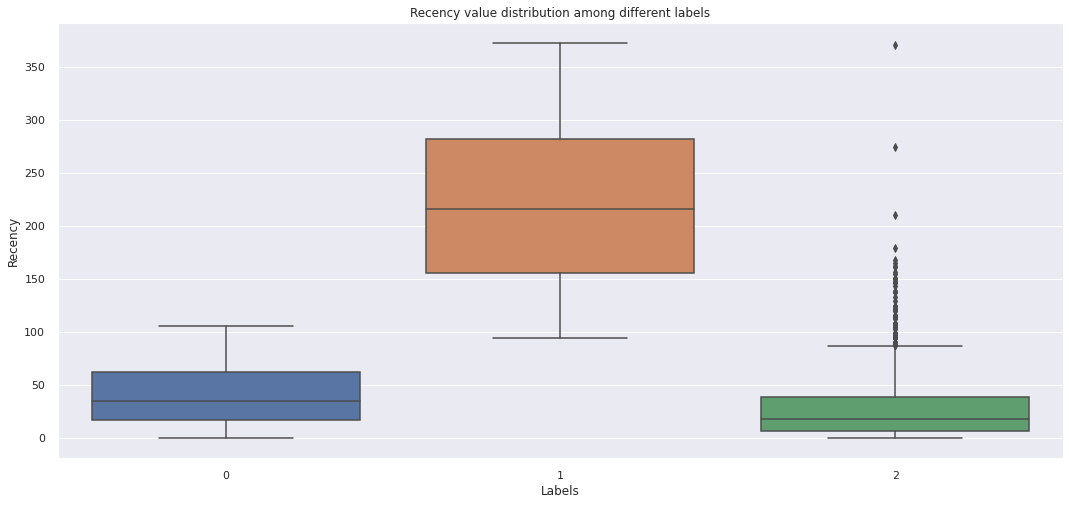

In [ ]:
#Visualising the values of recency for different Labels
visualise_dist(rfm_kmeans_df,y='Recency')

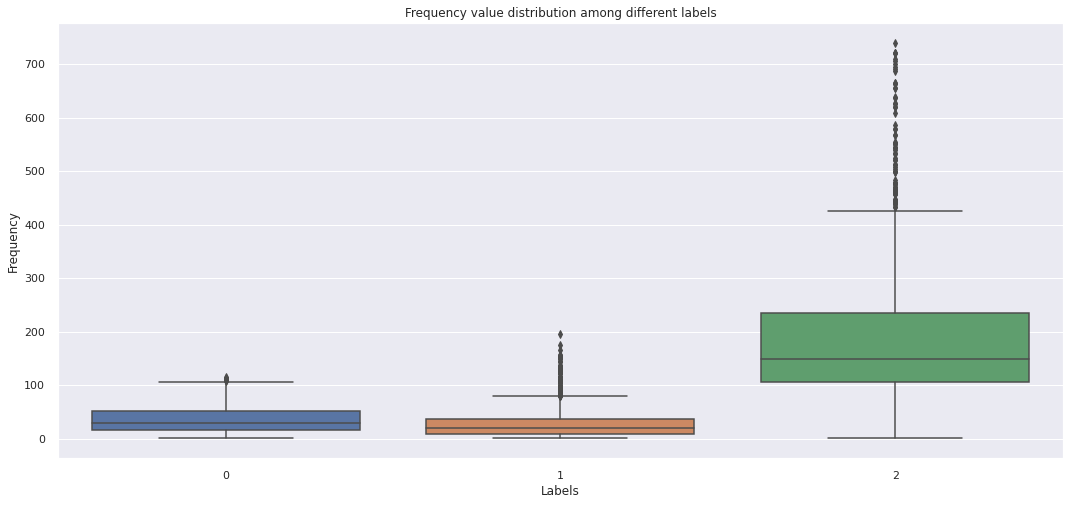

In [ ]:
#Visualising the values of frequency for different Labels
visualise_dist(rfm_kmeans_df,y='Frequency')

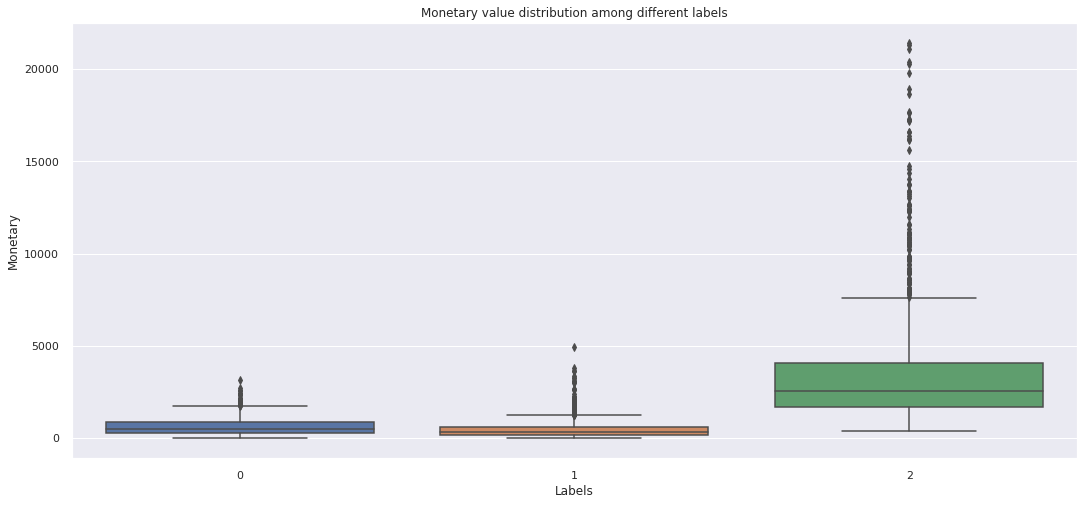

In [ ]:
#Visualising the values of Monetary for different Labels
visualise_dist(rfm_kmeans_df,y='Monetary')

1. Cluster 0 - These are the customers who have low monetary contribution, low frequency and low recency value. (Medium-importance cluster)
2. Cluster 1 - These are the customers who have low monetary contribution, low frequency and high recency value. (Low-importance cluster) (Worst cluster)
3. Cluster 2 - These are the customers who have high monetary contribution, high frequency value and low recency value. (High-importance cluster) (Best Cluster)

### Model 3:- Hierarchical clustering


Hierarchical clustering is another unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis or HCA.

In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram.

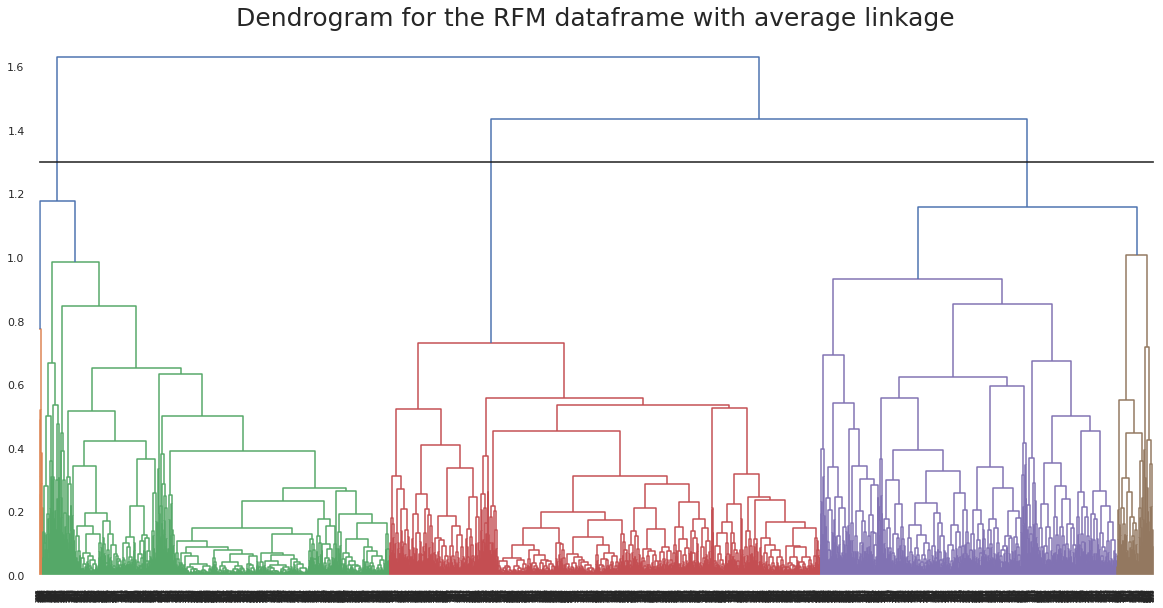

In [ ]:
#Getting the number of clusters using dendogram
plt.figure(figsize=(20,10))
merging = linkage(rfm_scaled_df,method='average',metric='euclidean')
dendrogram(merging)
plt.title('Dendrogram for the RFM dataframe with average linkage',size=25)

#Cutting the dendrogram at the longest vertical line without being cut by a horizontal line 
plt.axhline(y=1.3,c='k')
plt.show()

<b>We get the optimum number of clusters as 3 from the dendrogram.</b>

Hierarchical clustering has 2 types:
1. Agglomerative clustering.
2. Divisive Clustering.

In this project I'll be Going with the Agglomerative Clustering approach.

In [ ]:
#Applying the Agglomerative clustering model on the RFM dataset
from sklearn.cluster import AgglomerativeClustering
agglo_model_df = AgglomerativeClustering(n_clusters=3,linkage='average',affinity='euclidean')
cluster_predict_df2 = agglo_model_df.fit_predict(rfm_scaled_df)

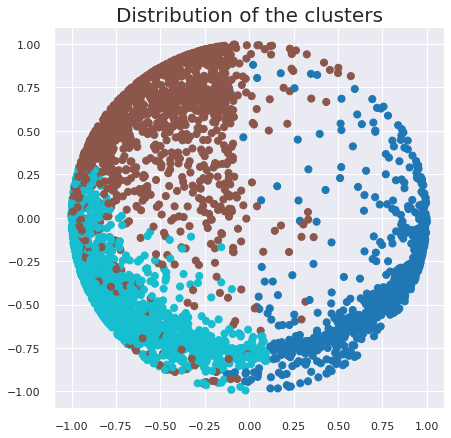

In [ ]:
#Visualising the agglomerative clustering
plt.figure(figsize=(7,7))
plt.scatter(x=rfm_scaled_df[:,0],y=rfm_scaled_df[:,1],c=cluster_predict_df2,s=50,cmap='tab10')

plt.title("Distribution of the clusters",size=20)
plt.show()

### Evaluation metrics for the Hierarchical Agglomerative model

In [ ]:
#Calculating the evaluation metrics for the Agglomerative model
eval_metrics(rfm_scaled_df,cluster_predict_df2)

The evaluation metrics are:

1. The silhouette score is: 0.547778779026372

2. The Calinski harabasz index is: 5910.981330994325

3. The Davies Bouldin score is: 0.6885462515794897


#### <b>Cluster profiling for Hierarchical Agglomerative approach with 3 clusters:</b>

In [ ]:
#Creating a copy of the original RFM dataframe
rfm_agglo_df = r_f_m_df.copy()

In [ ]:
#Assigning the labels to all the cusotmers
rfm_agglo_df['Labels'] = cluster_predict_df2
rfm_agglo_df.head()

,Recency,Frequency,Monetary,Labels
CustomerID,,,,
12347.0,1,182,4310.00,1
12348.0,74,31,1797.24,1
12349.0,18,73,1757.55,1
12350.0,309,17,334.40,0
12352.0,35,85,2506.04,1


In [ ]:
#Checking the value counts for different lables
rfm_agglo_df['Labels'].value_counts()

2    1654
0    1352
1    1277
Name: Labels, dtype: int64

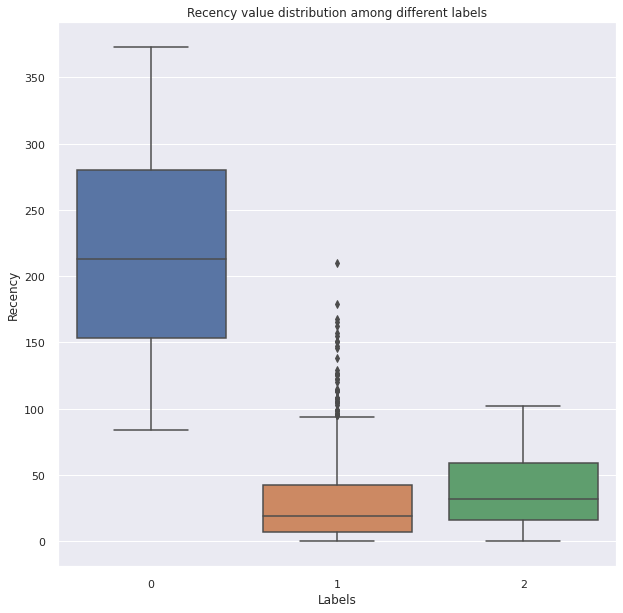

In [ ]:
#plotting private room 
plt.figure(figsize=(10,10))
#Visualising the values of recency for different Labels
visualise_dist(rfm_agglo_df,y='Recency')

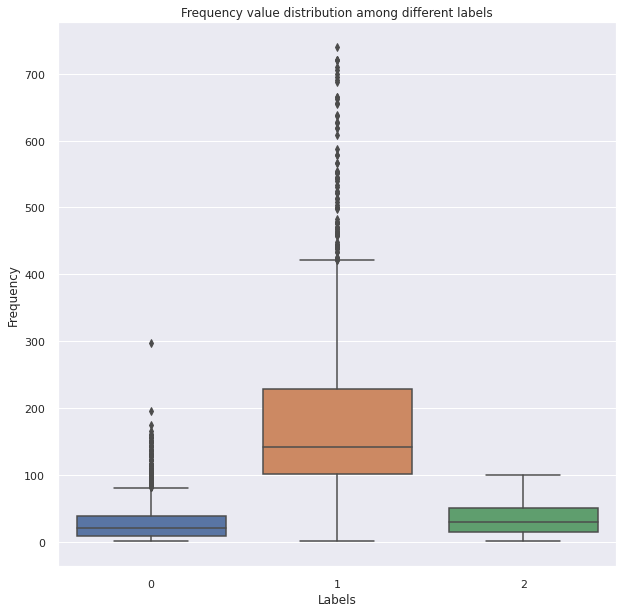

In [ ]:
#plotting private room 
plt.figure(figsize=(10,10))
#Visualising the values of Frequency for different Labels
visualise_dist(rfm_agglo_df,y='Frequency')

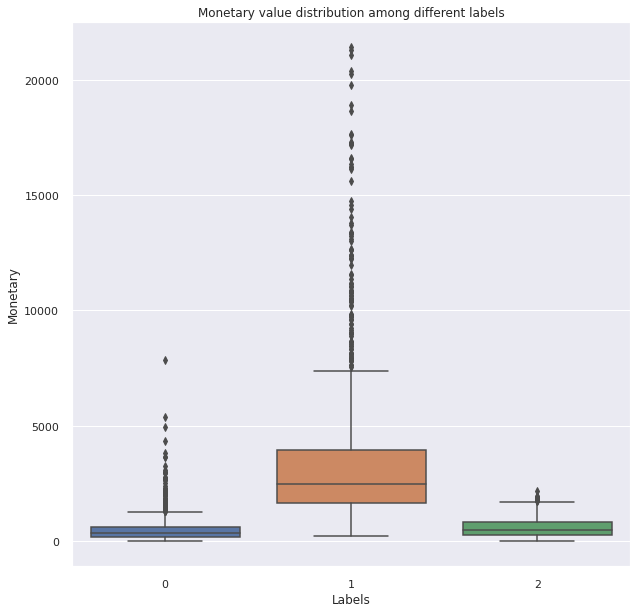

In [ ]:
#plotting private room 
plt.figure(figsize=(10,10))
#Visualising the values of Monetary for different Labels
visualise_dist(rfm_agglo_df,y='Monetary')

1. Cluster 0 - This is the cluster with high recency value, low frequency value and a low monetary contribution. (Low-importance cluster) (Worst cluster)
2. Cluster 1 - This is the cluster with low recency value, high frequency and a high monetary contribution. (High importance cluster) (Best Cluster)
3. Cluster 2 - This is the cluster with low recency value, low frequency and a low monetary contribution. (Medium-importance cluster)

### Model implementation conclusion with prettytable

In [ ]:
#Using pretty table to give model conclusions
from prettytable import PrettyTable

#Creating the Table
my_table_df = PrettyTable(['Model name','Tuning Method','No of Clusters','Silhouette score','Calinski harabasz index','Davies Bouldin score'])

#Adding rows that contain info about the models implemented.
my_table_df.add_row(['K Means Clustering','None','2','0.459251','3495.193','0.872454'])
my_table_df.add_row(['K means with elbow method','elbow method','3','0.564465','6465.176','0.65009'])
my_table_df.add_row(['Hierarchical clustering','Dendrogram','3','0.547778','5910.981','0.688546'])

print('Model Implementation Result:\n')
print(my_table_df)
print('\n K means with elbow method is the best model.')

Model Implementation Result:

+---------------------------+---------------+----------------+------------------+-------------------------+----------------------+
|         Model name        | Tuning Method | No of Clusters | Silhouette score | Calinski harabasz index | Davies Bouldin score |
+---------------------------+---------------+----------------+------------------+-------------------------+----------------------+
|     K Means Clustering    |      None     |       2        |     0.459251     |         3495.193        |       0.872454       |
| K means with elbow method |  elbow method |       3        |     0.564465     |         6465.176        |       0.65009        |
|  Hierarchical clustering  |   Dendrogram  |       3        |     0.547778     |         5910.981        |       0.688546       |
+---------------------------+---------------+----------------+------------------+-------------------------+----------------------+

 K means with elbow method is the best model.


# **7 Conclusion (EDA & ML Model)**

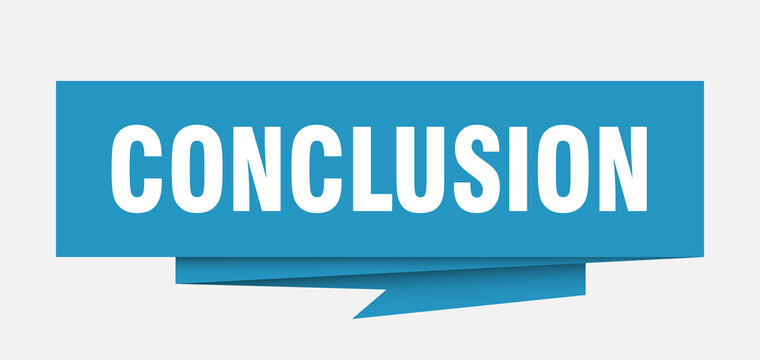

* Missing and duplicate values were found in the given dataset.

* Most of the purchases are from United Kingdom followed by Germany, France, Ireland and Spain.

* Most of the customers purchased items on Thursday, Wednesday, Tuesday.

* Most of the customers purchased items in the month of November, October, December, and the least number of purchases in April, January, February.

* Most of the customers start their purchase from 10:00 A.M till 2:00 P.M & the 12th hour of the day is the peak for purchasing. After 2:00 P.M the purchasing frequency gradually reduces.

* Top Five purchased products on the basis of their frequency:

   * WHITE HANGING HEART T-LIGHT HOLDER
   * REGENCY CAKESTAND 3 TIER
   * JUMBO BAG RED RETROSPOT
   * ASSORTED COLOUR BIRD ORNAMENT
   * PARTY BUNTING


• K-Means Clustering elbow method with Silhouette gives the highest score of 0.564465 for number of clusters 3.

• Sales has been increased from 2010 to 2011.


### Challenges faced

1. Removing outliers.
2. Choosing the right approach for segmentation.
3. Choosing the right ML models and evaluation metrics.

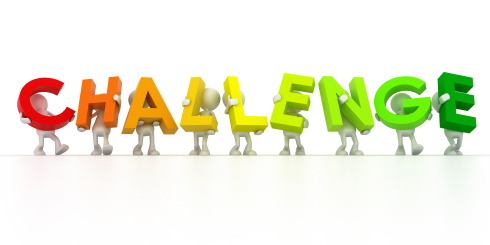


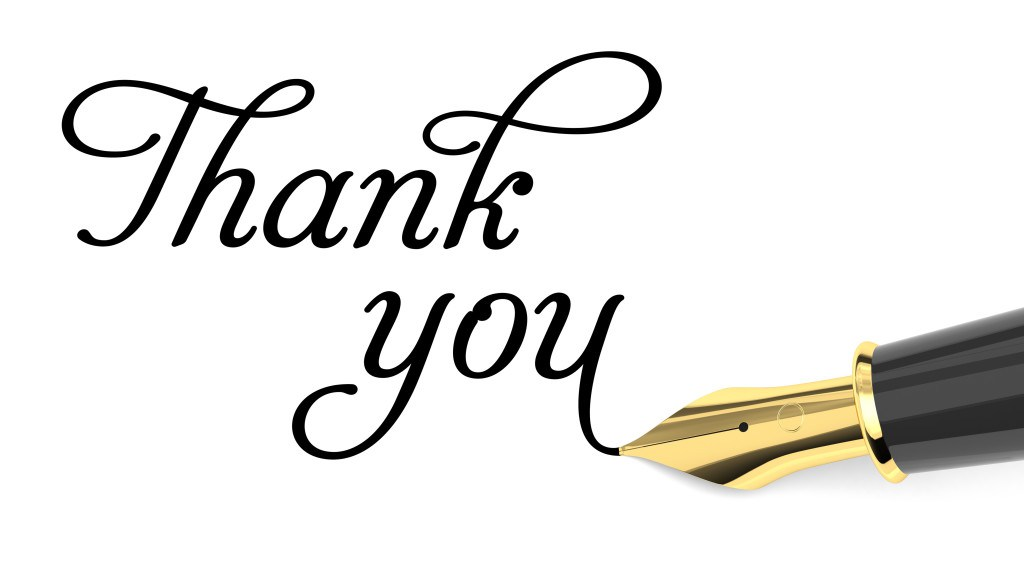